Step 1. Transfer Learning to extract images data

## VGG

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
VGG16().summary()

2025-06-09 11:01:22.994745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749466883.018552  401852 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749466883.027659  401852 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1749466886.895589  401852 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749466886.896329  401852 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [ ]:
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
model_vgg = Sequential()
model_vgg.add(conv_base)
model_vgg.add(Flatten())

In [ ]:
model_vgg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### Extracting Features from one image

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
img_dir = '/kaggle/input/temp-dataset/premium_photo-1664474619075-644dd191935f.jpeg'
image_loaded = load_img(img_dir,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr.shape
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch

In [ ]:
image_arr.shape

(1, 224, 224, 3)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
image_arr = preprocess_input(image_arr)

In [ ]:
image_arr.shape

(1, 224, 224, 3)

In [ ]:
image_arr_flatten = model_vgg.predict(image_arr)

I0000 00:00:1749466890.857340  401901 service.cc:148] XLA service 0x78b758004330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749466890.857375  401901 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749466890.857379  401901 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749466890.932249  401901 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


I0000 00:00:1749466892.735721  401901 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [ ]:
image_arr_flatten.shape

(1, 25088)

In [ ]:
image_arr_flatten.flatten().shape

(25088,)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/flickr8k


## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
ResNet50().summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
resnet_model = ResNet50(
    weights='imagenet',
    include_top=False,
    pooling='avg',
    input_shape=(224,224,3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
resnet_model.trainable = False
resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
model_resnet = Sequential()
model_resnet.add(resnet_model)
model_resnet.add(Flatten())

In [ ]:
model_resnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

### Extracting Features from one image

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
img_dir = 'first.png'
image_loaded = load_img(img_dir,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr.shape
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch

In [ ]:
image_arr.shape

(1, 224, 224, 3)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
image_arr = preprocess_input(image_arr)

In [ ]:
image_arr.shape

(1, 224, 224, 3)

In [ ]:
image_arr_flatten = model_resnet.predict(image_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [ ]:
image_arr_flatten.shape

(1, 2048)

In [ ]:
image_arr_flatten.flatten().shape

(2048,)

## Choose Model

In [ ]:
model_feature_extraction = model_resnet

In [ ]:
inp_shape = 2048 # choose according to model

## Download DATASET

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flickr8k


## PREPROCESS Caption

In [ ]:
caption_path = '/kaggle/input/flickr8k/captions.txt'
import pandas as pd
df = pd.read_csv(caption_path, header=None,names = ['images','caption'])
df.head(4)

,images,caption
0,image,caption
1,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
2,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
3,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .


In [ ]:
df.drop(index=[0],inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,images,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [ ]:
import re
def preprocess(sentence):
    sentence = re.sub(r'[^A-Za-z]',' ',sentence)
    sentence = sentence.lower()
    return sentence

In [ ]:
corpus = ""
for i in range(df.shape[0]):
    df['caption'][i] = "<START> " + preprocess(df['caption'][i]) + " <END>"
    corpus+= df['caption'][i] + '\n'

<ipython-input-50-8bf7ca9bcad6>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['caption'][i] = "<START> " + preprocess(df['caption'][i]) + " <END>"


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
len(corpus)

2837283

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df['caption'].tolist())

In [ ]:
# tokenizer.word_index

In [ ]:
df.shape

(40455, 2)

In [ ]:
df = df.iloc[:20000,:] # choose only first 1000 images

In [ ]:
df.shape

(20000, 2)

Multiple images

In [ ]:
img_path = '/kaggle/input/flickr8k/Images/'
features = []
for i in range(df.shape[0]):
    path = img_path+df['images'][i]
    image_loaded = load_img(path,target_size=(224,224))
    image_arr = img_to_array(image_loaded)
    image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
    image_arr = preprocess_input(image_arr)
    image_arr_feature = model_feature_extraction.predict(image_arr,verbose = False)
    image_arr_flatten = image_arr_feature.flatten()
    features.append(image_arr_flatten)

In [ ]:
df['features'] = features

In [ ]:
input_sequences_text=[]
input_sequences_feature=[]
for idx in range(df.shape[0]):
    sentence = df['caption'][idx]
    token = tokenizer.texts_to_sequences([sentence])[0]

    for j in range(1, len(token)):
        input_sequences_text.append(token[:j+1])
        input_sequences_feature.append(df['features'][idx])

In [ ]:
max_len_input_sequences_text = 0
for i in input_sequences_text:
  max_len_input_sequences_text = max(max_len_input_sequences_text,len(i))

In [ ]:
print(max_len_input_sequences_text)

38


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequences_padded = pad_sequences(input_sequences_text,maxlen = max_len_input_sequences_text,padding = 'pre')

In [ ]:
input_sequences_padded.shape

(237201, 38)

In [ ]:
x_senteces = input_sequences_padded[:,:-1]
x_features = np.array(input_sequences_feature)
y = input_sequences_padded[:,-1] # OHE of y is not required as we will use sparse_categorical_crossentropy

In [ ]:
x_senteces.shape

(237201, 37)

In [ ]:
x_features.shape

(237201, 2048)

In [ ]:
type(x_senteces)

numpy.ndarray

In [ ]:
type(x_features)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

## Model1

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

vocab_size = len(tokenizer.word_index) +1
max_len = max_len_input_sequences_text-1 # last column is y
embedding_dim = 512
lstm_unit = 512

In [ ]:
print(max_len)

37


feature input

In [ ]:
print(inp_shape)

2048


In [ ]:
image_input = Input(shape = (inp_shape,),name = 'image_input') # vgg feature input
image_d1 = Dense(1024,activation='relu')(image_input)
image_d2 = Dense(embedding_dim,activation='relu')(image_d1)
image_dropout = Dropout(0.1)(image_d2)

lstm layer

In [ ]:
caption_input = Input(shape = (max_len,),name = 'caption_input')
embedding_input = Embedding(vocab_size,output_dim = embedding_dim)(caption_input)
caption_lstm = LSTM(lstm_unit)(embedding_input)

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout, Add
merged_combined = Add()([image_dropout,caption_lstm])
decoder_dense = Dense(vocab_size,activation = 'softmax')(merged_combined)

In [ ]:
model_lstm1 = Model(inputs = [image_input,caption_input],outputs=decoder_dense)
model_lstm1.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam')

In [ ]:
model_lstm1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 2048)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1024)           │      2,098,176 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ caption_input             │ (None, 37)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        524,800 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 37, 512)        │      4,322,816 │ caption_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 512)            │      2,099,200 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 512)            │              0 │ dropout[0][0],         │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 8443)           │      4,331,259 │ add[0][0]              │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 13,376,251 (51.03 MB)

 Trainable params: 13,376,251 (51.03 MB)

 Non-trainable params: 0 (0.00 B)

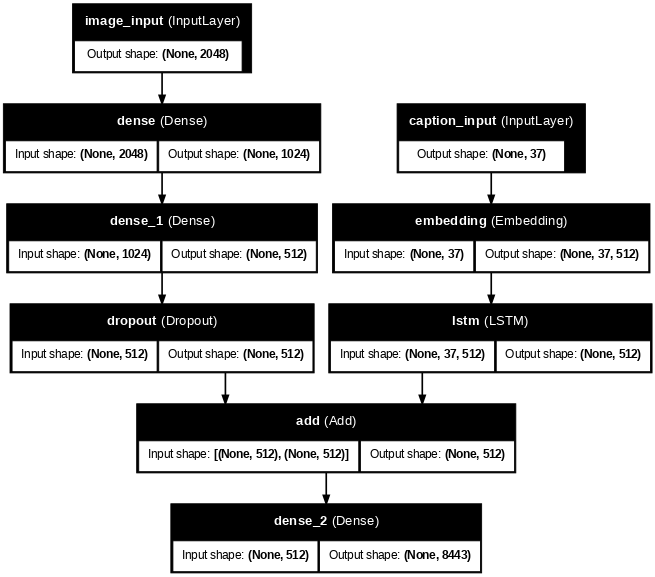

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_lstm1, show_shapes=True, show_layer_names=True,dpi=60)

In [ ]:
x_senteces.shape

(237201, 37)

In [ ]:
x_features.shape

(237201, 2048)

In [ ]:
y.shape

(237201,)

In [ ]:
hitory1 = model_lstm1.fit([x_features,x_senteces],y,epochs = 30,batch_size = 64)

Epoch 1/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - loss: 4.0856
Epoch 2/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 2.7915
Epoch 3/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 2.3723
Epoch 4/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 2.0599
Epoch 5/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 1.8148
Epoch 6/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 1.6205
Epoch 7/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 1.4544
Epoch 8/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 1.3063
Epoch 9/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 1.1902
Epoch 10/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 1.0952
Epoch 11/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 1.0143
Epoch 12/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 0.9525
Epoch 13/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 0.9002
Epoch 14/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 0.8578
E

### Prediction

1. Load the image

2. Get the features

3. sent to LSTM

In [ ]:
import time
def get_word(num):
  for word,index in tokenizer.word_index.items():
    if(index == num):
      return word

In [ ]:
path = '/kaggle/input/temp-dataset/premium_photo-1664474619075-644dd191935f.jpeg'
image_loaded = load_img(path,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
image_arr = preprocess_input(image_arr)
image_arr_feature = model_feature_extraction.predict(image_arr)


# send whole text at once

text = 'start'
last_word = 'start'
caption = ""
while(last_word != 'end'):
  text_token = (tokenizer.texts_to_sequences([text]))[0]
  input_padded = pad_sequences([text_token],maxlen = max_len_input_sequences_text-1,padding = 'pre')

  num = np.argmax(model_lstm1.predict([image_arr_feature,input_padded]))
  last_word = get_word(num)
  text = text+" "+ last_word
  print(text)
  time.sleep(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
start a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
start a woman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks on
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks on a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks on a cellphone
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
start a woman talks on a cellphone while
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks on a cellphone while sitting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a woman talks on a cellphone while sitting in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks on a cellphone while sitting in front
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks on a cellphone while sitting in front of
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks on a cellphone while sitting in front of a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talk

In [ ]:
path = '/kaggle/input/temp-dataset/premium_photo-1664474619075-644dd191935f.jpeg'
image_loaded = load_img(path,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
image_arr = preprocess_input(image_arr)
image_arr_feature = model_feature_extraction.predict(image_arr)


# send whole text at once

text = 'start'
last_word = 'start'
caption = ""
while(last_word != 'end'):
  text_token = (tokenizer.texts_to_sequences([text]))[0]
  input_padded = pad_sequences([text_token],maxlen = max_len_input_sequences_text-1,padding = 'pre')

  num = np.argmax(model_lstm1.predict([image_arr_feature,input_padded]))
  last_word = get_word(num)
  text = text+" "+ last_word
  print(text)
  time.sleep(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
start a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
start a woman talks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
start a woman talks on
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a woman talks on a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a woman talks on a cellphone
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks on a cellphone while
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a woman talks on a cellphone while sitting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a woman talks on a cellphone while sitting in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
start a woman talks on a cellphone while sitting in front
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a woman talks on a cellphone while sitting in front of
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a woman talks on a cellphone while sitting in front of a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
start a woman talks

## Model2

feature input

In [ ]:
image_input = Input(shape = (inp_shape,),name = 'image_input') # vgg feature input
image_d1 = Dense(1024,activation='relu')(image_input)
image_d2 = Dense(embedding_dim,activation='relu')(image_d1)
image_dropout = Dropout(0.2)(image_d2)

lstm layer

In [ ]:
caption_input = Input(shape = (max_len,),name = 'caption_input')
embedding_input = Embedding(vocab_size,output_dim = embedding_dim)(caption_input)
caption_lstm = LSTM(lstm_unit)(embedding_input)

In [ ]:
print(vocab_size)

In [ ]:
merged_combined = Add()([image_dropout,caption_lstm])
merged_dense = Dense(256,activation='relu')(merged_combined)
merged_dropout = Dropout(0.3)(merged_dense)
decoder_dense = Dense(vocab_size,activation = 'softmax')(merged_dropout)

In [ ]:
model_lstm2 = Model(inputs = [image_input,caption_input],outputs=decoder_dense)
model_lstm2.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam')

In [ ]:
model_lstm2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 2048)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1024)           │      2,098,176 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ caption_input             │ (None, 37)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512)            │        524,800 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 37, 512)        │      4,322,816 │ caption_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 512)            │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 512)            │      2,099,200 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 512)            │              0 │ dropout_1[0][0],       │
│                           │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 256)            │        131,328 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 256)            │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 8443)           │      2,169,851 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 11,346,171 (43.28 MB)

 Trainable params: 11,346,171 (43.28 MB)

 Non-trainable params: 0 (0.00 B)

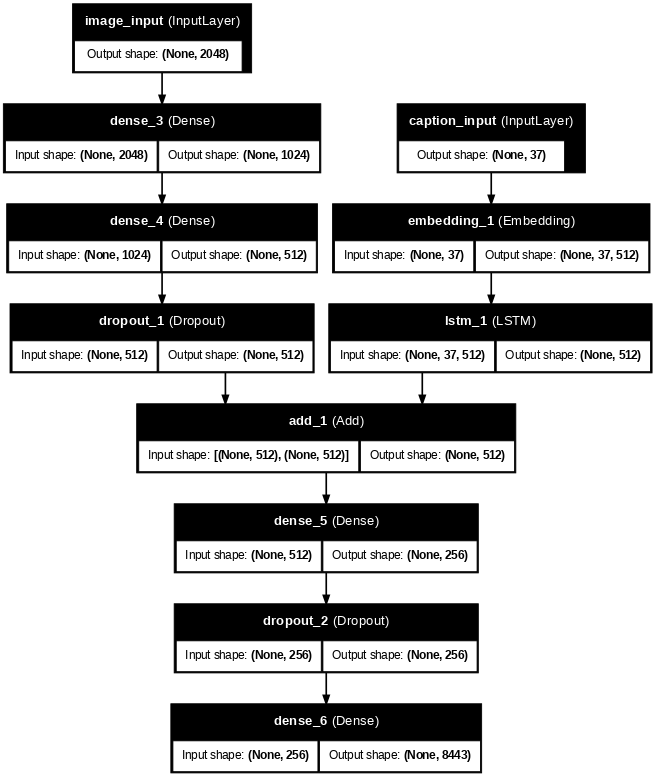

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_lstm2, show_shapes=True, show_layer_names=True,dpi=60)

In [ ]:
x_senteces.shape

(237201, 37)

In [ ]:
x_features.shape

(237201, 2048)

In [ ]:
y.shape

(237201,)

In [ ]:
hitory2 = model_lstm2.fit([x_features,x_senteces],y,epochs = 30,batch_size = 64)

Epoch 1/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 79s 20ms/step - loss: 4.5138
Epoch 2/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 3.4518
Epoch 3/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 3.1472
Epoch 4/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.9411
Epoch 5/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.7858
Epoch 6/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.6574
Epoch 7/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.5361
Epoch 8/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.4575
Epoch 9/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.3625
Epoch 10/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.2845
Epoch 11/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.2091
Epoch 12/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.1465
Epoch 13/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.0913
Epoch 14/30
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.0413
E

### Prediction

1. Load the image

2. Get the features

3. sent to LSTM

In [ ]:
path = '/kaggle/input/temp-dataset/premium_photo-1664474619075-644dd191935f.jpeg'
image_loaded = load_img(path,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
image_arr = preprocess_input(image_arr)
image_arr_feature = model_feature_extraction.predict(image_arr)


# send whole text at once

text = 'start'
last_word = 'start'
caption = ""
while(last_word != 'end'):
  text_token = (tokenizer.texts_to_sequences([text]))[0]
  input_padded = pad_sequences([text_token],maxlen = max_len_input_sequences_text-1,padding = 'pre')

  num = np.argmax(model_lstm2.predict([image_arr_feature,input_padded]))
  last_word = get_word(num)
  text = text+" "+ last_word
  print(text)
  time.sleep(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
start a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a man in a black
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
start a man in a black shirt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a black shirt is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
start a man in a black shirt is standing
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
start a man in a black shirt is standing next
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a black shirt is standing next to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a black shirt is standing next to a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a black shirt is standing next to a man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a black shirt is standing next to a man in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33m

In [ ]:
path = '/kaggle/input/temp-dataset/bird-8788491_1280.jpg'
image_loaded = load_img(path,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
image_arr = preprocess_input(image_arr)
image_arr_feature = model_feature_extraction.predict(image_arr)


# send whole text at once

text = 'start'
last_word = 'start'
caption = ""
while(last_word != 'end'):
  text_token = (tokenizer.texts_to_sequences([text]))[0]
  input_padded = pad_sequences([text_token],maxlen = max_len_input_sequences_text-1,padding = 'pre')

  num = np.argmax(model_lstm2.predict([image_arr_feature,input_padded]))
  last_word = get_word(num)
  text = text+" "+ last_word
  print(text)
  time.sleep(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
start a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a boy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
start a boy in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a boy in a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a boy in a blue
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a boy in a blue shirt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a boy in a blue shirt is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a boy in a blue shirt is jumping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a boy in a blue shirt is jumping in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a boy in a blue shirt is jumping in the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a boy in a blue shirt is jumping in the air
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a boy in a blue shirt is jumping in the air end


## Model3

feature input

In [ ]:
image_input = Input(shape = (inp_shape,),name = 'image_input') # vgg feature input
image_d1 = Dense(1024,activation='relu')(image_input)
image_d2 = Dense(embedding_dim,activation='relu')(image_d1)
image_dropout = Dropout(0.2)(image_d2)

lstm layer

In [ ]:
caption_input = Input(shape = (max_len,),name = 'caption_input')
embedding_input = Embedding(vocab_size,output_dim = embedding_dim)(caption_input)
caption_lstm = LSTM(lstm_unit)(embedding_input)
lstm_dropout = Dropout(0.3)(caption_lstm)

In [ ]:
print(vocab_size)

8443


In [ ]:
merged_combined = Add()([image_dropout,lstm_dropout])
merged_combined_dropout = Dropout(0.3)(merged_combined)
merged_dense = Dense(256,activation='relu')(merged_combined_dropout)
merged_dropout = Dropout(0.3)(merged_dense)
decoder_dense = Dense(vocab_size,activation = 'softmax')(merged_dropout)

In [ ]:
model_lstm3 = Model(inputs = [image_input,caption_input],outputs=decoder_dense)
model_lstm3.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam')

In [ ]:
model_lstm3.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 2048)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ caption_input             │ (None, 37)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1024)           │      2,098,176 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 37, 512)        │      4,322,816 │ caption_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 512)            │        524,800 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 512)            │      2,099,200 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 512)            │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 512)            │              0 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 512)            │              0 │ dropout_3[0][0],       │
│                           │                        │                │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 512)            │              0 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 256)            │        131,328 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 256)            │              0 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 8443)           │      2,169,851 │ dropout_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 11,346,171 (43.28 MB)

 Trainable params: 11,346,171 (43.28 MB)

 Non-trainable params: 0 (0.00 B)

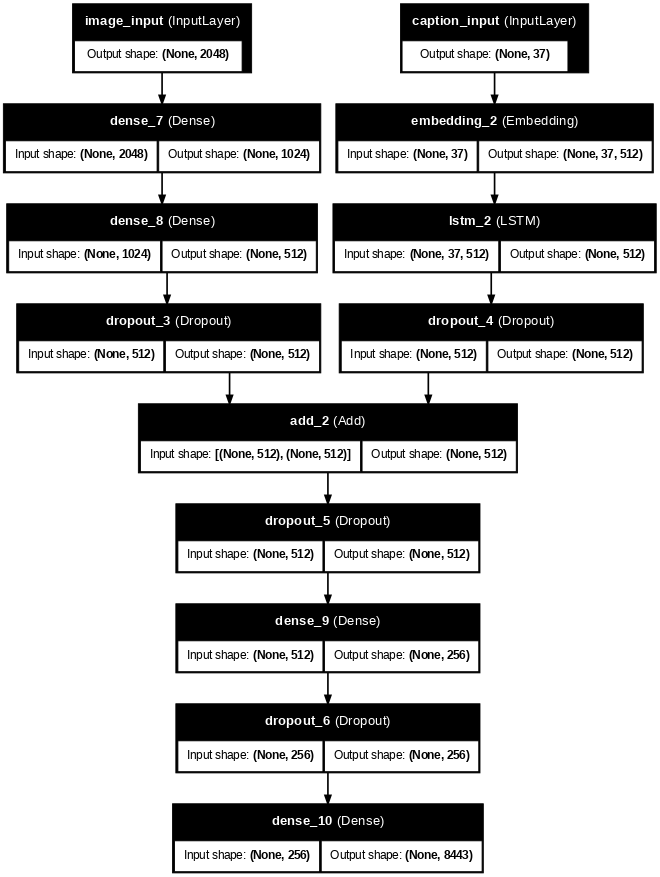

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_lstm3, show_shapes=True, show_layer_names=True,dpi=60)

In [ ]:
x_senteces.shape

(237201, 37)

In [ ]:
x_features.shape

(237201, 2048)

In [ ]:
y.shape

(237201,)

In [ ]:
hitory3 = model_lstm3.fit([x_features,x_senteces],y,epochs = 20,batch_size = 64)

Epoch 1/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 79s 20ms/step - loss: 4.6499
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 3.6761
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 3.4168
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 3.2618
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 3.1642
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 3.0687
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 3.0044
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.9566
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.9146
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.8772
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.8526
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.8305
Epoch 13/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.8131
Epoch 14/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - loss: 2.7885
E

### Prediction

1. Load the image

2. Get the features

3. sent to LSTM

In [ ]:
import time
def get_word(num):
  for word,index in tokenizer.word_index.items():
    if(index == num):
      return word

In [ ]:
path = '/kaggle/input/temp-dataset/premium_photo-1664474619075-644dd191935f.jpeg'
image_loaded = load_img(path,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
image_arr = preprocess_input(image_arr)
image_arr_feature = model_feature_extraction.predict(image_arr)


# send whole text at once

text = 'start'
last_word = 'start'
caption = ""
while(last_word != 'end'):
  text_token = (tokenizer.texts_to_sequences([text]))[0]
  input_padded = pad_sequences([text_token],maxlen = max_len_input_sequences_text-1,padding = 'pre')

  num = np.argmax(model_lstm3.predict([image_arr_feature,input_padded]))
  last_word = get_word(num)
  text = text+" "+ last_word
  print(text)
  time.sleep(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
start a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
start a man in a red shirt is standing
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt is standing in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt is standing in front
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
start a man in a red shirt is standing in front of
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt is standing in front of a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt is standing in front of a man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a m

In [ ]:
path = '/kaggle/input/temp-dataset/bird-8788491_1280.jpg'
image_loaded = load_img(path,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
image_arr = preprocess_input(image_arr)
image_arr_feature = model_feature_extraction.predict(image_arr)


# send whole text at once

text = 'start'
last_word = 'start'
caption = ""
while(last_word != 'end'):
  text_token = (tokenizer.texts_to_sequences([text]))[0]
  input_padded = pad_sequences([text_token],maxlen = max_len_input_sequences_text-1,padding = 'pre')

  num = np.argmax(model_lstm3.predict([image_arr_feature,input_padded]))
  last_word = get_word(num)
  text = text+" "+ last_word
  print(text)
  time.sleep(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a man in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
start a man in a red shirt is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a man in a red shirt is standing
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt is standing on
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
start a man in a red shirt is standing on a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt is standing on a rocky
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
start a man in a red shirt is standing on a rocky beach
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a man in a red shirt is standing on a rocky beach end


## Model 4

In [ ]:
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Bidirectional, Concatenate, BatchNormalization
from keras.models import Model
from keras.regularizers import l2

# Regularization parameter
l2_reg = 1e-4

# Image input pipeline
image_input = Input(shape=(inp_shape,), name='image_input')  # VGG feature input
image_d1 = Dense(256, activation='relu', kernel_regularizer=l2(l2_reg))(image_input)
image_bn1 = BatchNormalization()(image_d1)
image_d2 = Dense(512, activation='relu', kernel_regularizer=l2(l2_reg))(image_bn1)  # Matching BiLSTM output dim
image_bn2 = BatchNormalization()(image_d2)
image_dropout = Dropout(0.4)(image_bn2)

# Caption input pipeline
caption_input = Input(shape=(max_len,), name='caption_input')
embedding_input = Embedding(vocab_size, output_dim=embedding_dim)(caption_input)

# Stacked Bidirectional LSTM
x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.3,
                       kernel_regularizer=l2(l2_reg)))(embedding_input)
x = BatchNormalization()(x)
x = Bidirectional(LSTM(256, return_sequences=False, dropout=0.3, recurrent_dropout=0.3,
                       kernel_regularizer=l2(l2_reg)))(x)
caption_bn = BatchNormalization()(x)

# Merging
merged_combined = Concatenate()([image_dropout, caption_bn])  # Concatenate instead of Add
merged_bn = BatchNormalization()(merged_combined)
merged_dropout = Dropout(0.4)(merged_bn)
merged_dense = Dense(256, activation='relu', kernel_regularizer=l2(l2_reg))(merged_dropout)
merged_bn2 = BatchNormalization()(merged_dense)
merged_dense2 = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg))(merged_bn2)
merged_bn3 = BatchNormalization()(merged_dense2)
final_dropout = Dropout(0.4)(merged_bn3)

# Output layer
decoder_dense = Dense(vocab_size, activation='softmax')(final_dropout)

# Final model
model_lstm4 = Model(inputs=[image_input, caption_input], outputs=decoder_dense)
model_lstm4.compile(loss='sparse_categorical_crossentropy', optimizer='adam')


In [ ]:
hitory4 = model_lstm4.fit([x_features,x_senteces],y,epochs = 13,batch_size = 128)

Epoch 1/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 683s 356ms/step - loss: 5.6544
Epoch 2/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 660s 356ms/step - loss: 3.8878
Epoch 3/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 658s 355ms/step - loss: 3.6370
Epoch 4/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 656s 354ms/step - loss: 3.4838
Epoch 5/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 657s 355ms/step - loss: 3.3997
Epoch 6/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 655s 353ms/step - loss: 3.3228
Epoch 7/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 654s 353ms/step - loss: 3.2475
Epoch 8/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 653s 352ms/step - loss: 3.1950
Epoch 9/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 653s 352ms/step - loss: 3.1366
Epoch 10/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 653s 352ms/step - loss: 3.1170
Epoch 11/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 654s 353ms/step - loss: 3.0776
Epoch 12/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 654s 353ms/step - loss: 3.0688
Epoch 13/13
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 656s 354ms/step - loss: 3.0187


In [ ]:
path = '/kaggle/input/temp-dataset/bird-8788491_1280.jpg'
image_loaded = load_img(path,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
image_arr = preprocess_input(image_arr)
image_arr_feature = model_feature_extraction.predict(image_arr)


# send whole text at once

text = 'start'
last_word = 'start'
caption = ""
while(last_word != 'end'):
  text_token = (tokenizer.texts_to_sequences([text]))[0]
  input_padded = pad_sequences([text_token],maxlen = max_len_input_sequences_text-1,padding = 'pre')

  num = np.argmax(model_lstm4.predict([image_arr_feature,input_padded]))
  last_word = get_word(num)
  text = text+" "+ last_word
  print(text)
  time.sleep(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
start a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
start a boy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
start a boy is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
start a boy is jumping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
start a boy is jumping in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
start a boy is jumping in the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
start a boy is jumping in the air
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
start a boy is jumping in the air end


In [ ]:
path = '/kaggle/input/temp-dataset/premium_photo-1664474619075-644dd191935f.jpeg'
image_loaded = load_img(path,target_size=(224,224))
image_arr = img_to_array(image_loaded)
image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
image_arr = preprocess_input(image_arr)
image_arr_feature = model_feature_extraction.predict(image_arr)


# send whole text at once

text = 'start'
last_word = 'start'
caption = ""
while(last_word != 'end'):
  text_token = (tokenizer.texts_to_sequences([text]))[0]
  input_padded = pad_sequences([text_token],maxlen = max_len_input_sequences_text-1,padding = 'pre')

  num = np.argmax(model_lstm3.predict([image_arr_feature,input_padded]))
  last_word = get_word(num)
  text = text+" "+ last_word
  print(text)
  time.sleep(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
start a man in a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
start a man in a red
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a man in a red shirt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
start a man in a red shirt is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
start a man in a red shirt is standing
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt is standing in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
start a man in a red shirt is standing in front
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
start a man in a red shirt is standing in front of
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
start a man in a red shirt is standing in front of a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a man in a red shirt is standing in front of a man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
start a ma

In [ ]:
model_lstm4.save("caption_model.h5")

In [ ]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# IMPORTING NEW

In [ ]:
from tensorflow.keras.models import load_model

# For .h5
model_lstm = load_model("caption_model.h5")

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [ ]:
import pickle
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

In [ ]:
import time
from tensorflow.keras.preprocessing.sequence import pad_sequences
def get_word(num):
  for word,index in tokenizer.word_index.items():
    if(index == num):
      return word

In [ ]:
max_len_input_sequences_text = 38

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
def get_caption(path):
  image_loaded = load_img(path,target_size=(224,224))
  image_arr = img_to_array(image_loaded)
  image_arr = np.expand_dims(image_arr,axis = 0)    # model accepts as a batch
  image_arr = preprocess_input(image_arr)
  image_arr_feature = model_feature_extraction.predict(image_arr,verbose=False)


  # send whole text at once

  text = 'start'
  last_word = 'start'
  caption = ""
  while(last_word != 'end'):
    text_token = (tokenizer.texts_to_sequences([text]))[0]
    input_padded = pad_sequences([text_token],maxlen = max_len_input_sequences_text-1,padding = 'pre')

    num = np.argmax(model_lstm.predict([image_arr_feature,input_padded],verbose=False))
    last_word = get_word(num)
    text = text+" "+ last_word
  return text

In [ ]:
get_caption('first.png')

'start a little girl in a blue dress is sitting in the grass end'

In [ ]:
get_caption('second.png')

'start a little girl in a blue shirt is sitting on a wooden bench end'

In [ ]:
get_caption('third.png')

'start a white dog is running through the snow end'

In [ ]:
get_caption('fourth.jpg')

'start a boy in a green shirt is playing in the grass end'